<center><h1>Motion models and Kalman filter</h1></center>
<hr/>

#### Imports

In [1]:
from Particle_Tracker import *

### Trajectories

In [2]:
# Spiral
def test_kalman(A, C, Q_i, R_i):
    N = 40
    v = np.linspace(5 * math.pi, 0, N)
    x = np.cos(v) * v
    y = np.sin(v) * v

    sx = np.zeros((x.size, 1 ), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1 ), dtype=np.float32).flatten()
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((A.shape[0], 1), dtype=np.float32).flatten()
    state[0] = x[0]
    state[1] = y[0]
    covariance = np.eye(A.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        state, covariance , _ , _ = kalman_step(A, C, Q_i, R_i , np.reshape(np.array([x[j], y[j]]), (-1, 1)), np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[1] 

    return x, y, sx, sy

In [3]:
# Flower
def test_kalman2(A, C, Q_i, R_i):
    N = 40
    t = np.linspace(0, 3 * np.pi, N)
    x = (np.sin(t) + np.sin(2 * t) / 2 + np.sin(3 * t) / 3) * np.cos(t)
    y = (np.sin(t) + np.sin(2 * t) / 2 + np.sin(3 * t) / 3) * np.sin(t)

    sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((A.shape[0], 1), dtype=np.float32).flatten()
    state[0] = x[0]
    state[1] = y[0]
    covariance = np.eye(A.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        state, covariance, _, _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),
                                              np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[1]

    return x, y, sx, sy


In [4]:
# Zig-zag ring
def test_kalman3(A, C, Q_i, R_i):
    N = 40
    t = np.linspace(0, 2 * np.pi, N+1)[:-1]
    r = np.zeros((N,), dtype=np.float32)
    r[::2] = 1.0
    r[1::2] = 0.8

    x = r * np.cos(t)
    y = r * np.sin(t)

    sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((A.shape[0], 1), dtype=np.float32).flatten()
    state[0] = x[0]
    state[1] = y[0]
    covariance = np.eye(A.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        state, covariance, _, _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),
                                              np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[1]

    return x, y, sx, sy


In [5]:
def test(kalman, model):
    _, ax = plt.subplots(1, 5, figsize=(25, 5))
    for i, (q, r) in enumerate([(100., 1.), (5., 1.), (1., 1.), (1., 5.), (1., 100.)]): 
        A, C, Q_i, R_i = init_model(model, 1, q, r)
        x, y, sx, sy = kalman(A, C, Q_i, R_i)
        ax[i].plot(x, y, color='red', marker='o')
        ax[i].plot(sx, sy, color='blue', marker='o')
        ax[i].set_title('RW: q={:.1f}, r={:.1f}'.format(q, r))

    plt.tight_layout()
    plt.show()

#### Random Walk (RW)

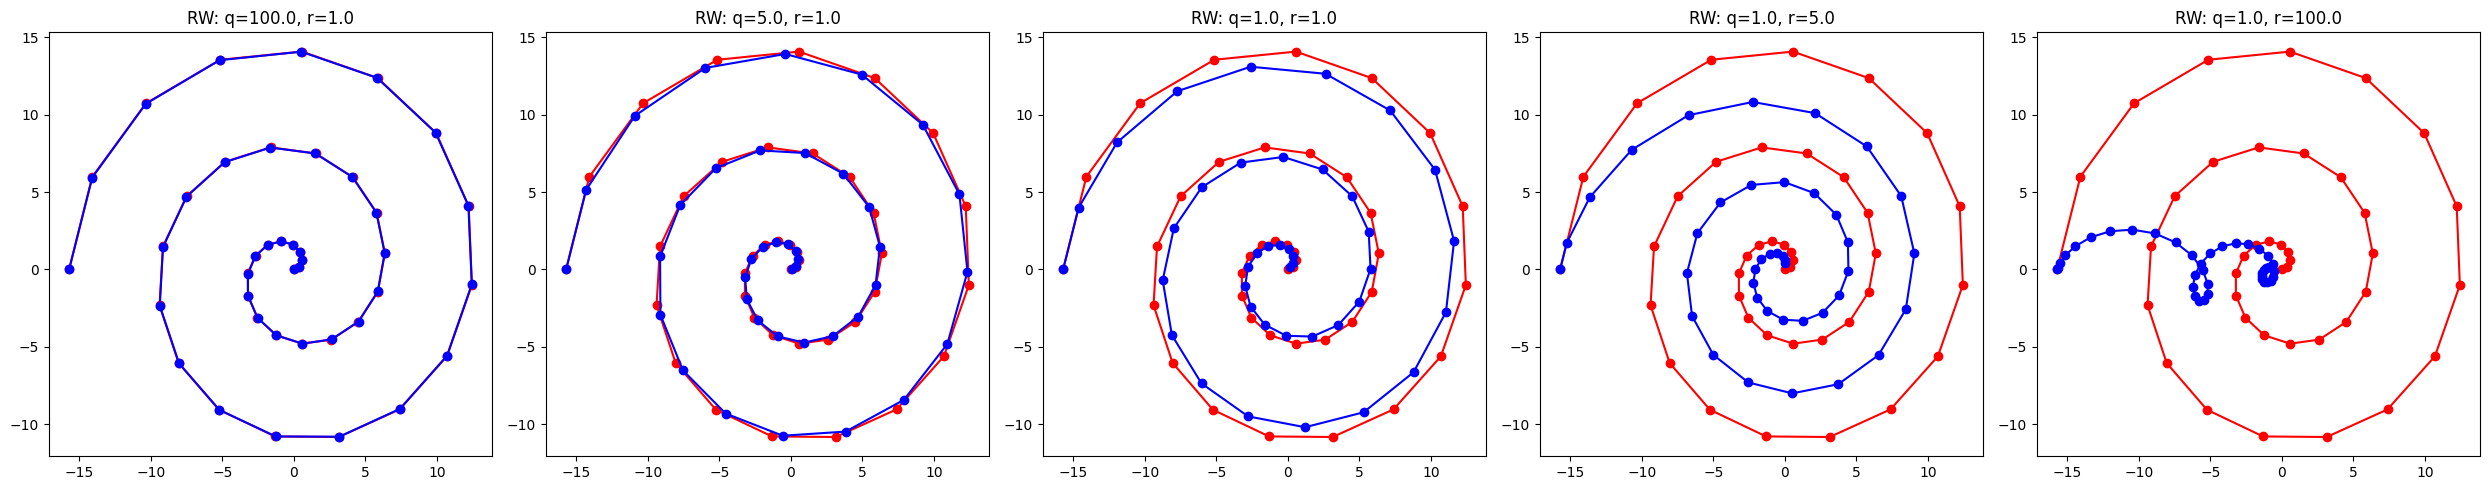

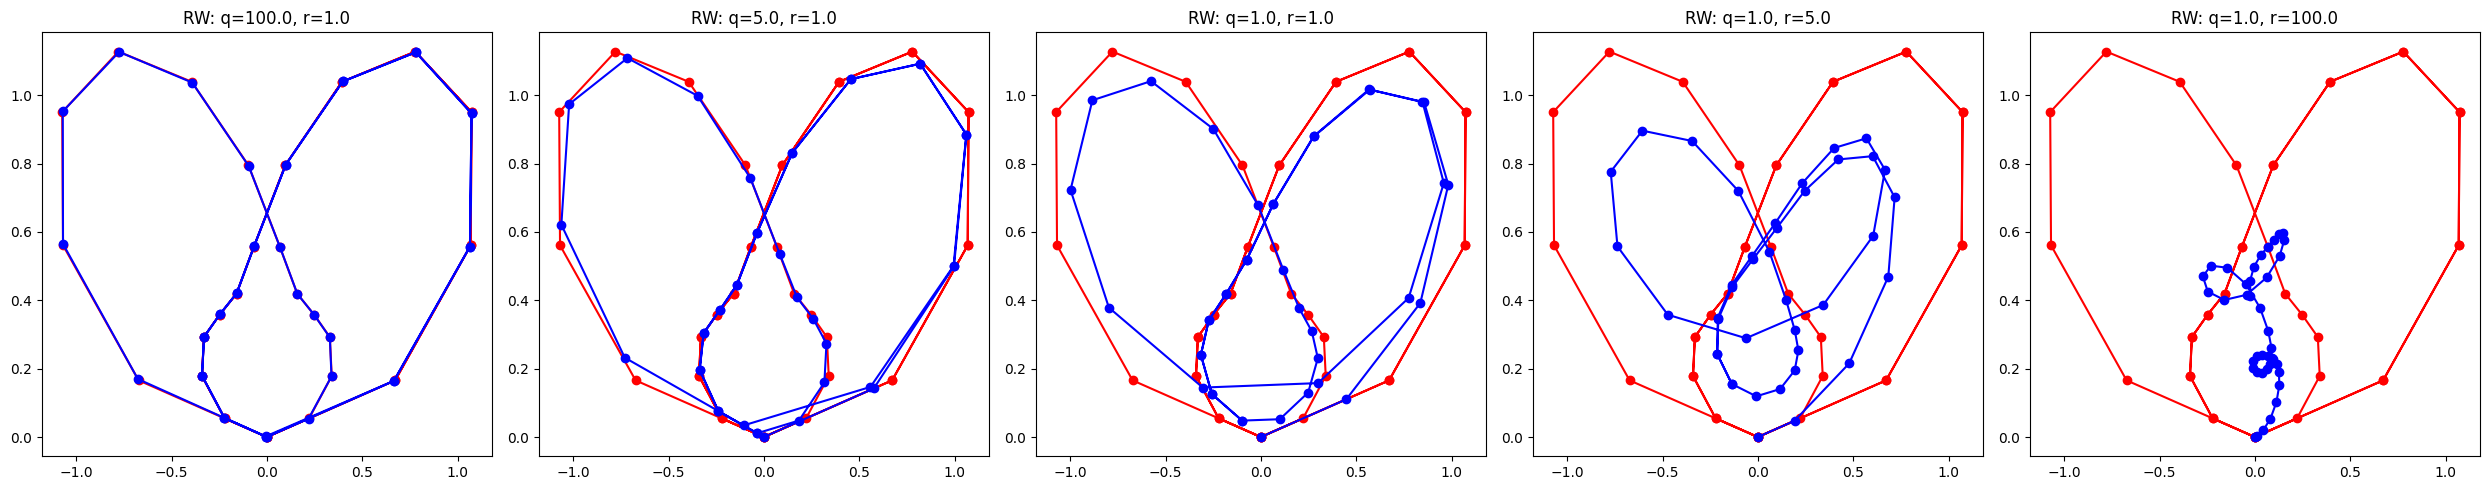

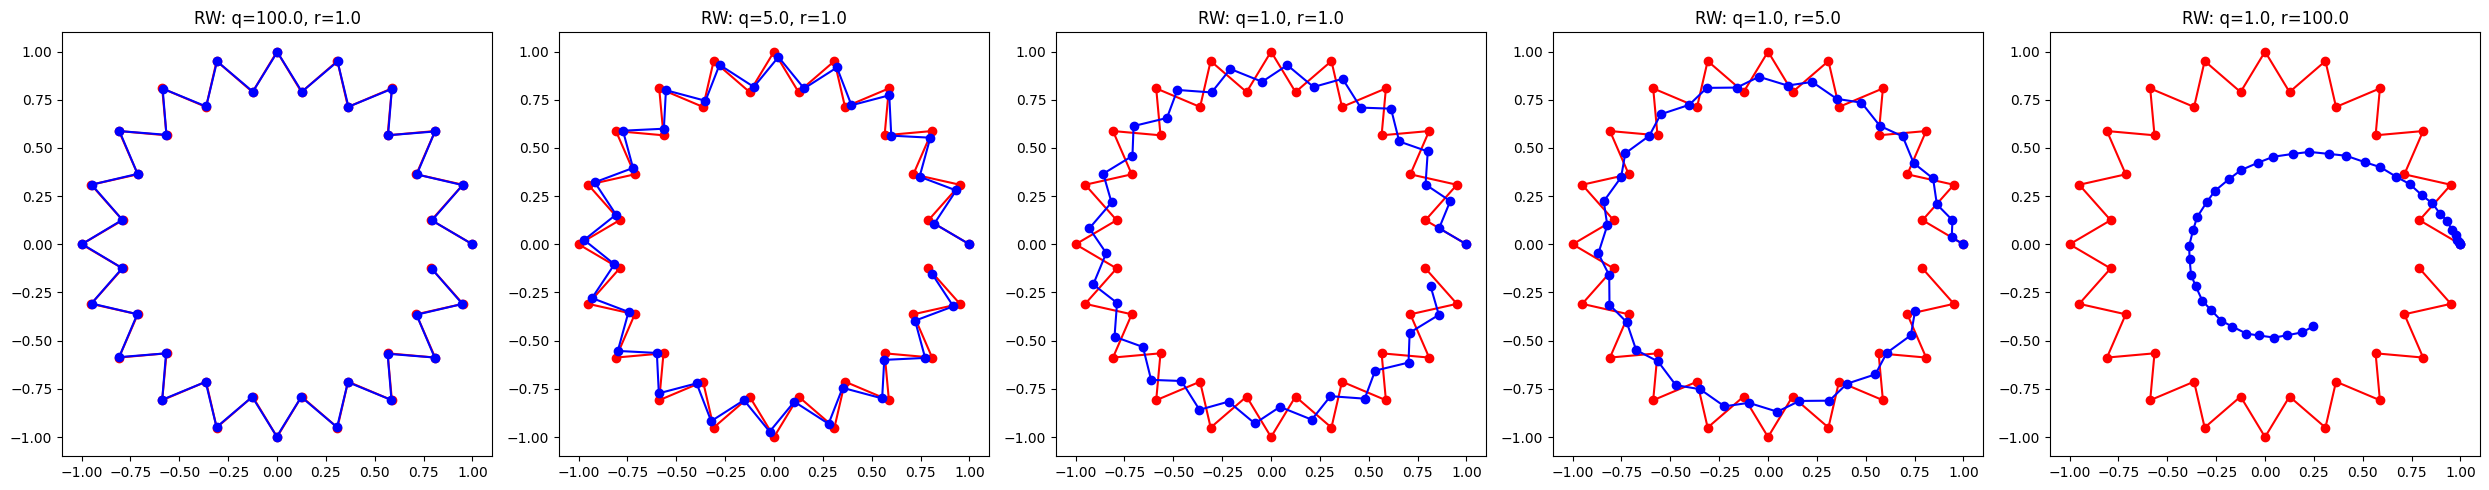

In [6]:
test(test_kalman, 'RW')
test(test_kalman2, 'RW')
test(test_kalman3, 'RW')

#### Nearly Constant Velocity (NCV)

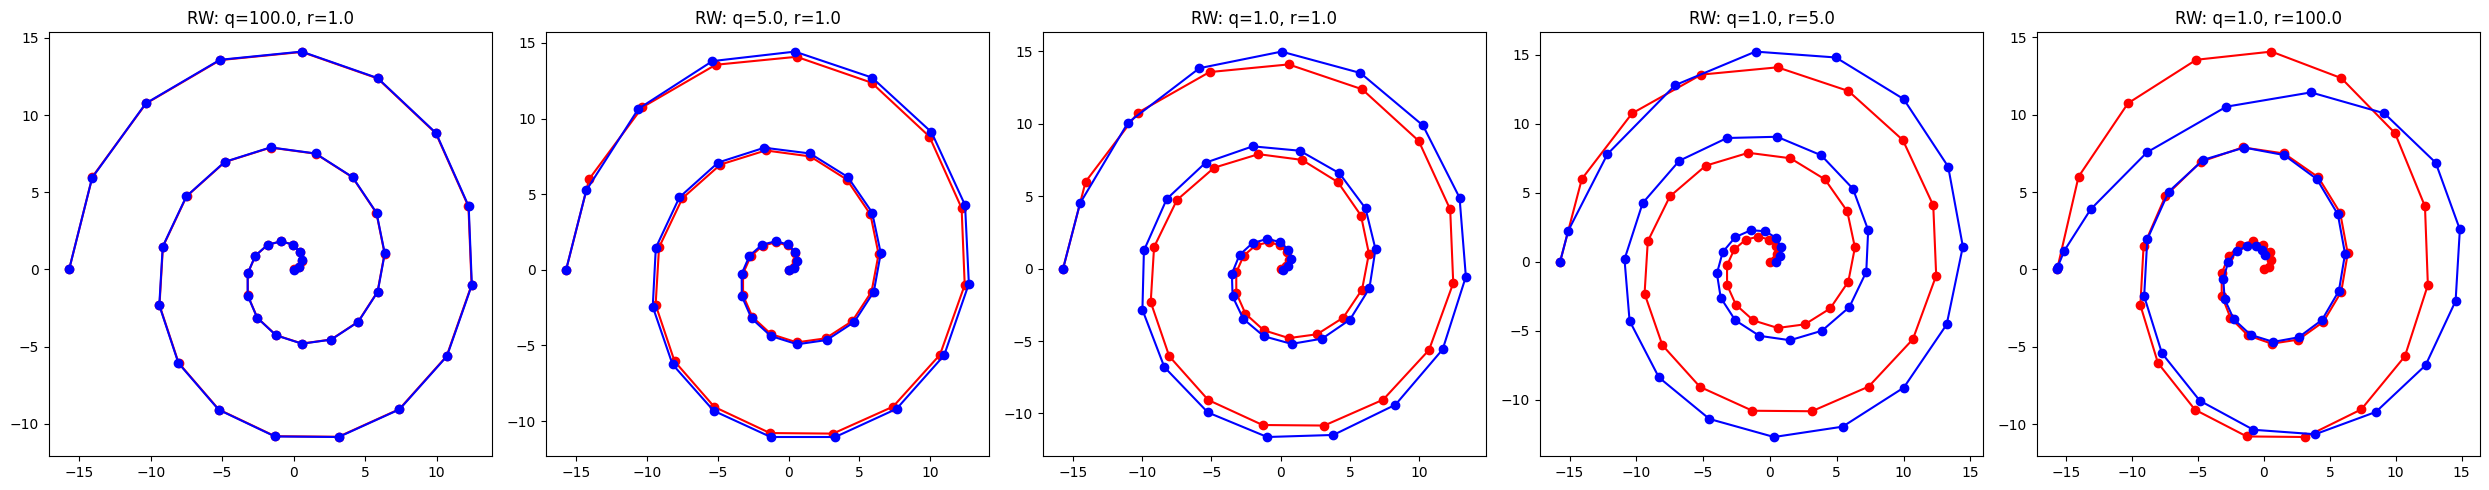

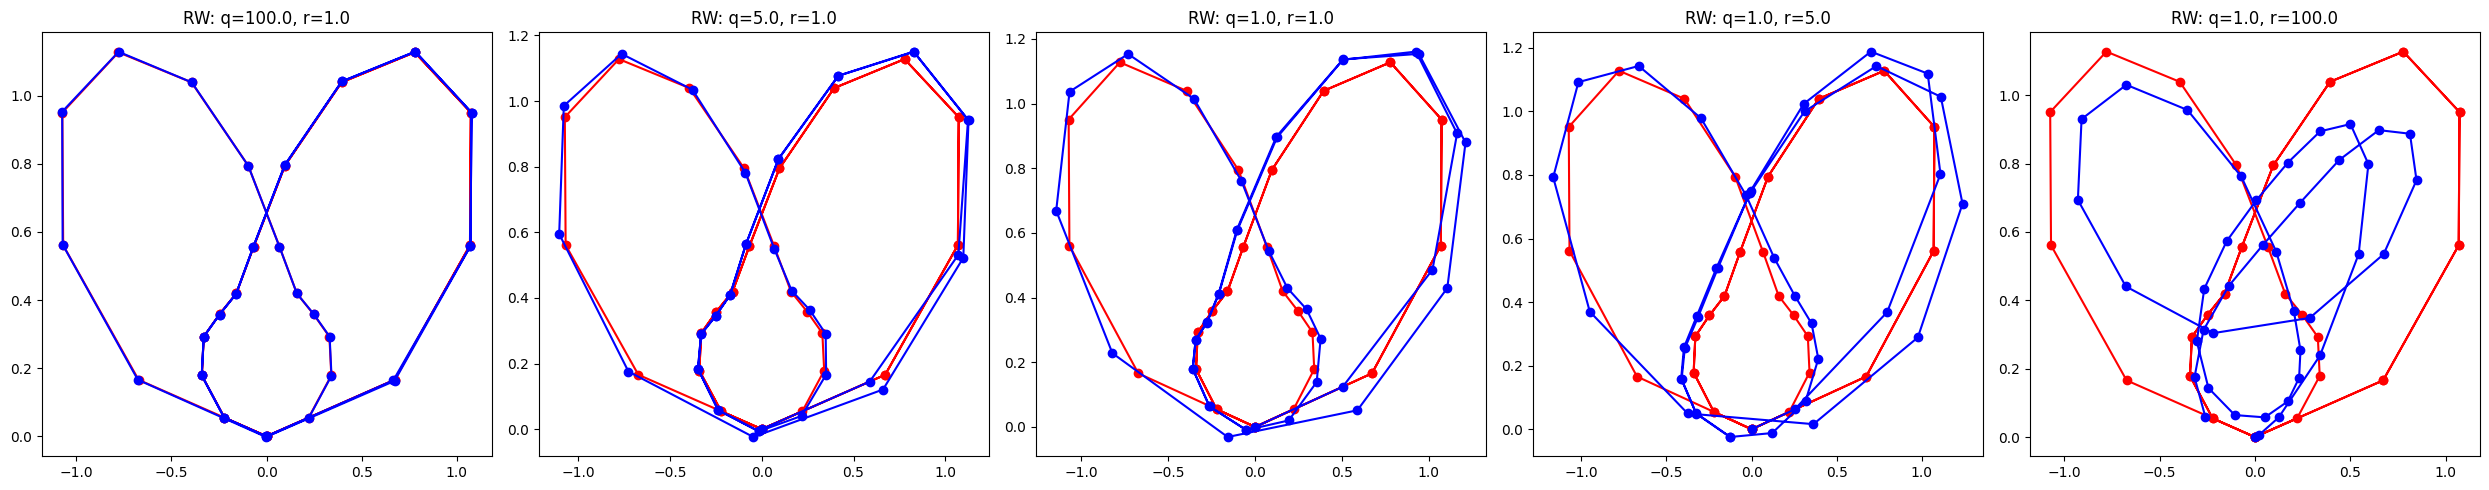

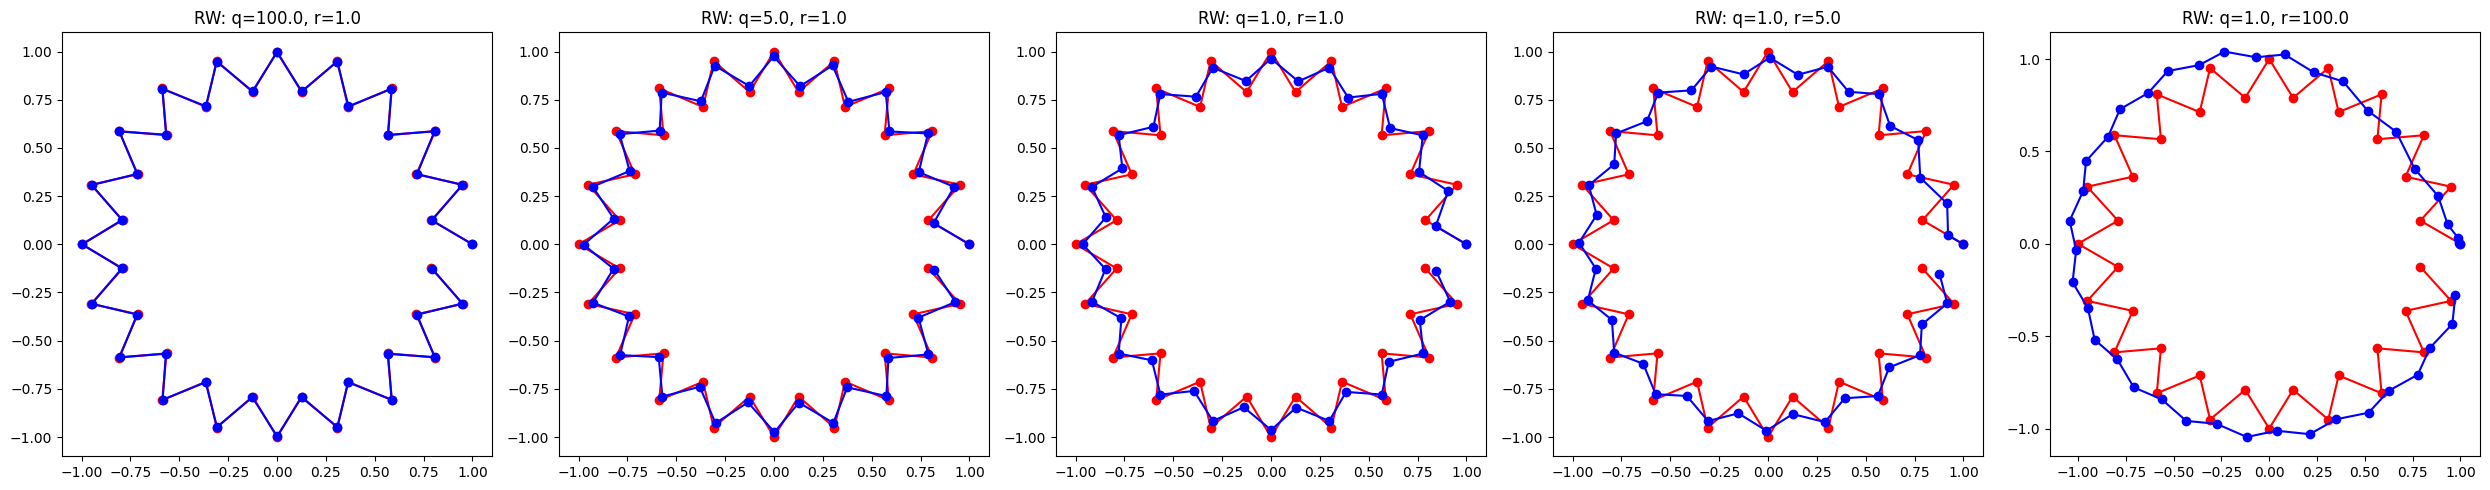

In [7]:
test(test_kalman, 'NCV')
test(test_kalman2, 'NCV')
test(test_kalman3, 'NCV')

#### Nearly Constant Acceleartion (NCA)

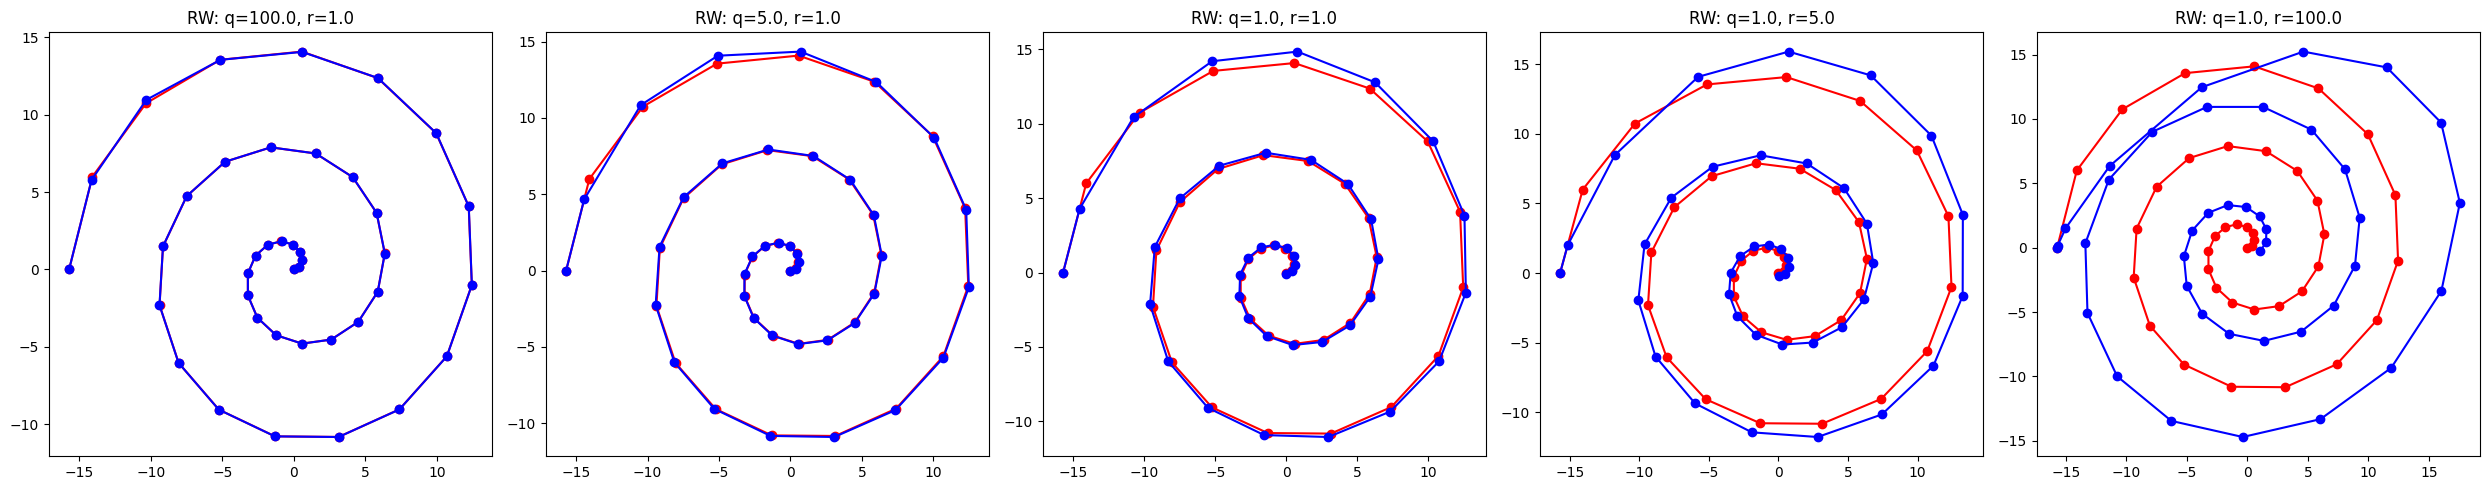

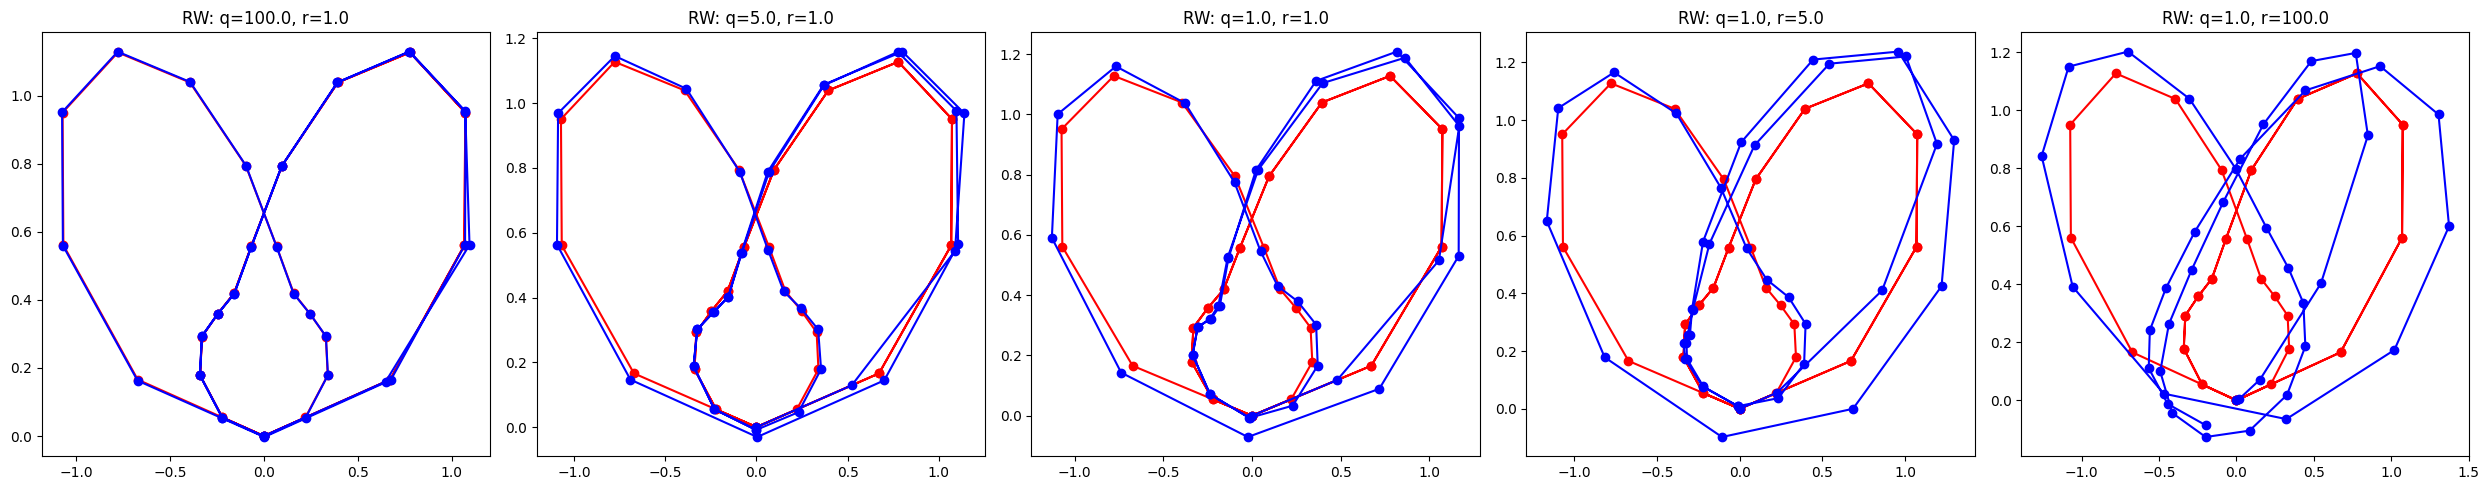

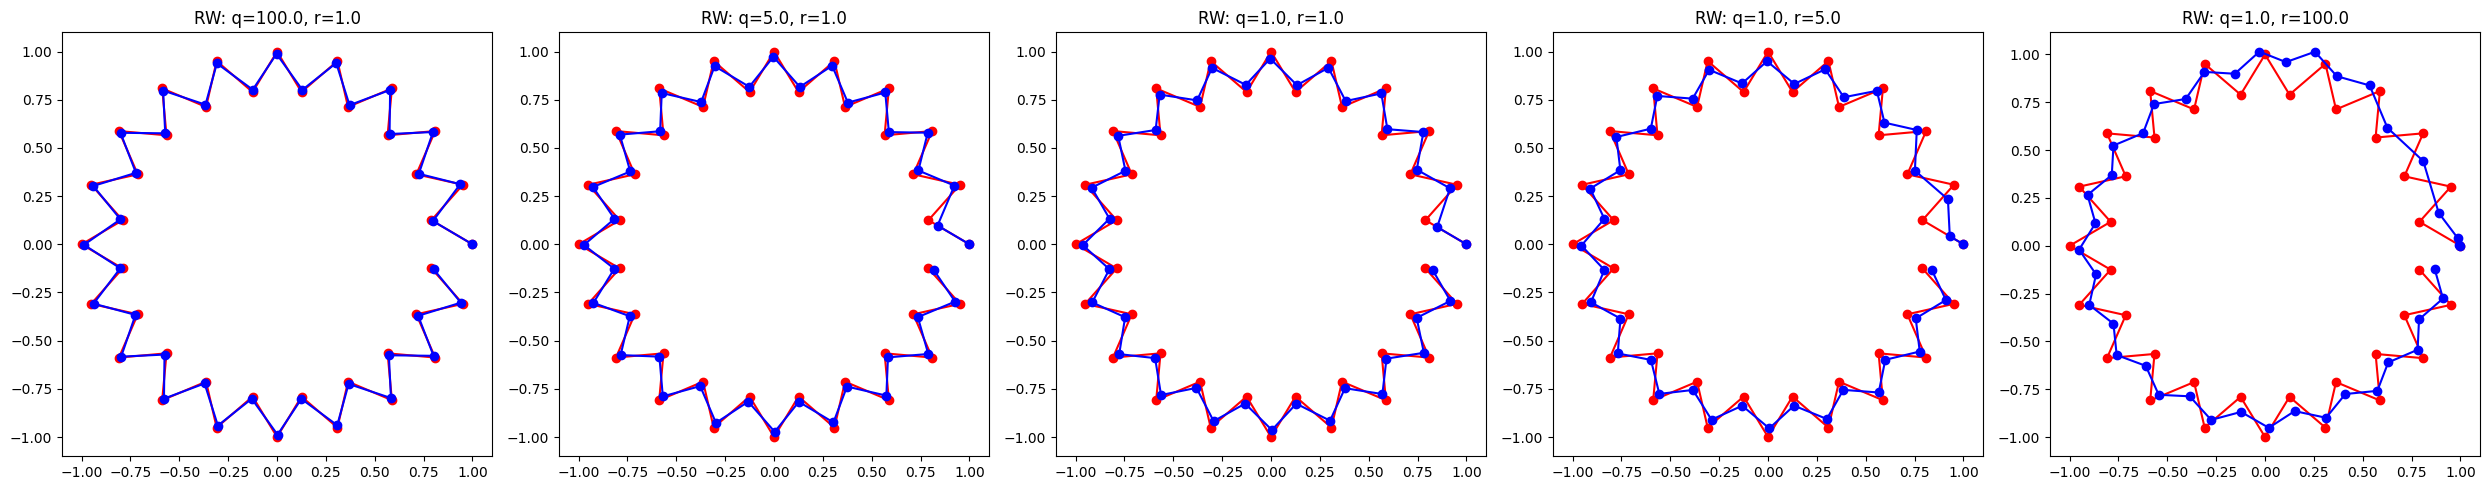

In [8]:
test(test_kalman, 'NCA')
test(test_kalman2, 'NCA')
test(test_kalman3, 'NCA')